# Basic Statistic in Python

There are two major modules for doing statistical analyses in Python:

* Scipy - basic statistics and distribution fitting
* Statsmodels - advanced statistical modeling focused on linear models (including ANOVA, multiple regression, generalized linear models, etc.)

To see the full functionality of these modules you'll need to look through their pages, but here are a few examples to show you that a lot of the standard statistical tests and models you need to perform can be easily done using Python.

### Imports
You'll want the stats module from Scipy and the api and formula.api modulesfrom statsmodels. We'll also go ahead and import Numpy for use in generating data and Matplotlib for some graphing.

In [2]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Descriptive Statistics

stats.describe() gives basic descriptive statistics on any list of numbers. It returns (in the following order) the size of the data, it's min and max, the mean, the variance, skewness, and kurtosis.

In [3]:
x = [1, 2, 3, 4, 5]
stats.describe(x)

DescribeResult(nobs=5, minmax=(1, 5), mean=3.0, variance=2.5, skewness=0.0, kurtosis=-1.3)

In [4]:
# We can also get this kind of information for columns in a DataFrame using the .describe() method.
data = pd.DataFrame([[1, 2, 3.5], [2, 2.4, 3.1], [3, 1.8, 2.5]], columns=['a', 'b', 'c'])
print(data)
data.describe()

   a    b    c
0  1  2.0  3.5
1  2  2.4  3.1
2  3  1.8  2.5


,a,b,c
count,3.0,3.000000,3.000000
mean,2.0,2.066667,3.033333
std,1.0,0.305505,0.503322
min,1.0,1.800000,2.500000
25%,1.5,1.900000,2.800000
50%,2.0,2.000000,3.100000
75%,2.5,2.200000,3.300000
max,3.0,2.400000,3.500000


## T-tests

Standard 1-sample and 2-sample t-tests (as well as many other basic statistical tests) are available in scipy.stats. T-tests return two values, the t-statistic and the p-value. First, let's generate some data that is normally distributed around zero.

In [5]:
x1 = np.random.randn(100, 1)
x2 = np.random.randn(100, 1)

### One-sample t-test

To determine if the mean of x1 is different from some number use a one-sample t-test. We'll compare the mean of x1 to both 0 (which it shouldn't be different from) and to 1 (which it should be different from).

In [6]:
tstat, pval = stats.ttest_1samp(x1, 0)
print("Comparison of the mean of x1 to 0.\nT-statistic = %s; P-value = %s." % (tstat, pval))

tstat, pval = stats.ttest_1samp(x1, 1)
print("Comparison of the mean of x1 to 5.\nT-statistic = %s; P-value = %s." % (tstat, pval))

Comparison of the mean of x1 to 0.
T-statistic = [ 0.64244715]; P-value = [ 0.52206791].
Comparison of the mean of x1 to 5.
T-statistic = [-10.07575802]; P-value = [  7.47771748e-17].


### Two-sample t-test

To determine if the mean of two different sets of numbers are different from one another wuse a two-sample t-test. We'll compare the means of x1 and x2, which should be different from one another since they should both be about zero.

In [7]:
tstat, pval = stats.ttest_ind(x1, x2)
print("Comparison of the means of x1 and x2.\nT-statistic = %s; P-value = %s." % (tstat, pval))

Comparison of the means of x1 and x2.
T-statistic = [-0.03724889]; P-value = [ 0.97032409].


## Distribution fitting and analysis

scipy.stats also includes a powerful general system for working with statistical distribution. Let's generate some random normally distributed numbers to analyze.

In [8]:
u, sigma = 4, 2
random_numbers = stats.norm.rvs(u, sigma, size=50)
random_numbers

array([ 4.47602867, -0.56662786,  3.76559914,  1.95267772,  3.81356525,
        2.11131559,  1.10883035,  6.44897398,  3.84493581,  6.68880497,
        3.29047081,  2.75461975,  5.35197501,  5.52090139,  5.91780623,
        1.79748463,  3.67177013,  2.70097245,  5.09444445,  8.62879114,
        5.02853736,  3.95603213,  5.81797875,  7.5805891 ,  5.9475601 ,
        3.83862396,  4.0084384 ,  3.38307613,  7.64146886,  7.29806023,
        4.88111035,  3.28801892,  8.1428048 , -2.94606996,  7.2374045 ,
        5.67982809,  2.56191257,  3.99938439,  5.2570962 ,  3.59817257,
        8.302022  ,  3.969618  , -0.22337212,  2.17539586,  3.03676413,
        4.61488712,  2.63159664,  3.30377423,  2.99145516,  6.24530598])

> We can then fit distributions to this data.

In [9]:
stats.norm.fit(random_numbers)

(4.2324162811536601, 2.3052402599050859)

## Regression

You can do simple univariate OLS regression in Scipy, but for anything more complicated you'll need statsmodels, so we'll just do the basics in statsmodels as well.

First, we'll generate some data and plot it.

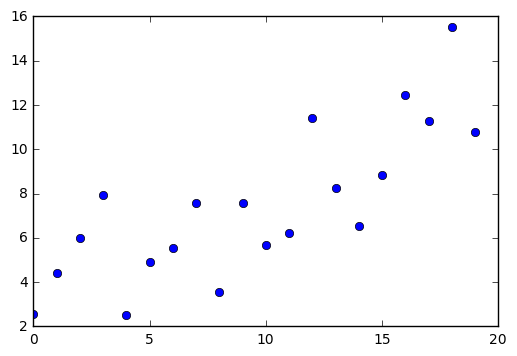

In [9]:
# generate some data
x = np.array(range(20))
y = 3 + 0.5 * x + 2 * np.random.randn(20)
data = pd.DataFrame(list(zip(x, y)), columns=['x', 'y'])

# plot the data
plt.plot(data['x'], data['y'], 'bo')
plt.show()

### Workaround

Use directly the zip in pd.DataFrame return error. This is because zip now returns an iterator in python 3, hence your error message. For more details see: [docs.python.org/3/library/functions#zip](https://docs.python.org/3/library/functions.html#zip)

Now let's do a regression. We'll use formulas to specify regression models. This allows us to write our code in simple and intuitive ways, and means the we don't have to remember how to create design matrices for more complicated models. To do this we'll need to be using Pandas to manage the data. The regression function is name ols for "ordinary least-squares" the standard approach to regression. It takes two arguments. The first is a formula describing the regression we want to fit. In this case we just want to model the effect of x on y so we use y ~ x, where x and y are the names of columns in a data frame. The second argument is the name of the data frame that contains the columns x and y.

In [10]:
results = smf.ols('y ~ x', data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     30.28
Date:                Sat, 26 Nov 2016   Prob (F-statistic):           3.17e-05
Time:                        13:15:47   Log-Likelihood:                -42.721
No. Observations:                  20   AIC:                             89.44
Df Residuals:                      18   BIC:                             91.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0999      0.931      3.331      0.0

So, .summary() presents us with most of the information we would want about the regression. We can also pull this information out in individual pieces. For example,

In [11]:
intercept, slope = results.params
r2 = results.rsquared
print(slope, intercept, r2)

0.460726648081 3.09990210693 0.627141425135


This makes it easy to store the key results of large numbers of analyses, or present the results in alternative ways, like graphs.

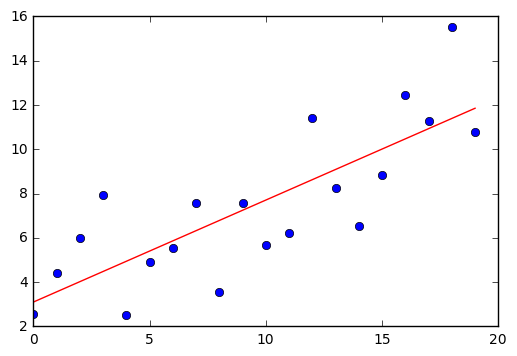

In [12]:
plt.plot(data['x'], data['y'], 'bo')
plt.hold(True)
x = np.array([min(x), max(x)])
y = intercept + slope * x
plt.plot(x, y, 'r-')
plt.show()

You'll notice that in order to plot the regression line what we actually do is plot a line with the appropriate slope and intercept by:

1. taking the minimum and maximum values of x
2. calculating their values of y based on the regression results
3. and plotting those two points with a straight line connecting them and no symbols

## Multiple-regression

Multiple-regression works the same way, but with additional terms in the formula.

In [15]:
import pandas as pd

# generate some data
x = np.random.randn(50)
z = np.random.randn(50)
noise = np.random.randn(50)
y = 3 + 0.5 * x + 1.5 * z + noise

data = pd.DataFrame(list(zip(x, y, z)), columns=['x', 'y', 'z'])
results = smf.ols('y ~ x + z', data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sat, 26 Nov 2016   Prob (F-statistic):           3.87e-19
Time:                        13:17:09   Log-Likelihood:                -57.686
No. Observations:                  50   AIC:                             121.4
Df Residuals:                      47   BIC:                             127.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.1774      0.112     28.248      0.0

In [16]:
# This makes it easy to do more complicated designs, including interactions.
results = smf.ols('y ~ x + z + x*z', data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     81.70
Date:                Sat, 26 Nov 2016   Prob (F-statistic):           1.88e-18
Time:                        13:17:19   Log-Likelihood:                -56.662
No. Observations:                  50   AIC:                             121.3
Df Residuals:                      46   BIC:                             129.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.1188      0.119     26.178      0.0

In [17]:
# We can also include transformations in formulas using functions from Numpy.
results = smf.ols('y ~ x + np.log10(z)', data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     11.26
Date:                Sat, 26 Nov 2016   Prob (F-statistic):           0.000389
Time:                        13:17:26   Log-Likelihood:                -33.044
No. Observations:                  26   AIC:                             72.09
Df Residuals:                      23   BIC:                             75.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       5.0835      0.214     23.771      

## ANOVA

Using formulas also makes it easy to conduct statistical tests that are based on linear models. ANOVA is simply a linear model with appropriate dummy variables set up for each factor. To do this in statsmodels we simply use C() to tell the module that the variable of interest is categorical.

This time, let's start by grabbing some data from the web.

In [23]:
url = 'http://stats191.stanford.edu/data/rehab.csv'
rehab_table = pd.read_table(url, delimiter=",")
rehab_table

,Fitness,Time
0,1,29
1,1,42
2,1,38
3,1,40
4,1,43
5,1,40
6,1,30
7,1,42
8,2,30
9,2,35


> To see if the time to rehabilitate an injury is related to the fitness category we do the same as above, but wrapping the predictor in C().

In [24]:
results = smf.ols('Time ~ C(Fitness)', rehab_table).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     16.96
Date:                Sat, 26 Nov 2016   Prob (F-statistic):           4.13e-05
Time:                        12:25:09   Log-Likelihood:                -68.286
No. Observations:                  24   AIC:                             142.6
Df Residuals:                      21   BIC:                             146.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          38.0000      1.574     

While all of the information that we want is technically present in this table, we typically want it presented in more standard fashion for ANOVA. We can do this using the anova_lm function.

In [25]:
from statsmodels.stats.anova import anova_lm

anova_lm(results)

,df,sum_sq,mean_sq,F,PR(>F)
C(Fitness),2.0,672.0,336.000000,16.961538,0.000041
Residual,21.0,416.0,19.809524,NaN,NaN


### And lots more

Statsmodels includes much more advanced functionality including:

* Generalized Least Squares (i.e., correlated error structures such as for spatial and comparative analysis)
* Generalized Linear Models (i.e., non-normal error)
* Robust Linear Models
* Regression with Discrete Dependent Variable (e.g., logistic regression)
* Time Series analysis